In [9]:
# imports
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [14]:
train_dataset_url="fruits-360/Training"
test_dataset_url="fruits-360/Test"

In [15]:
# creating train and test folders
train_folder=os.listdir(train_dataset_url)
test_folder=os.listdir(test_dataset_url)

In [16]:
# checking the number of classes in train and test folder
print("Train Class: ", len(train_folder))
print("Test Class: ", len(test_folder))

Train Class:  22
Test Class:  22


In [17]:
# listing out names of each class of fruit present in train_folder
print(train_folder)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams']


In [18]:
# listing out names of each class of fruit present in test_folder
print(test_folder)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams']


In [19]:
#  importing libraries to change image into tensor dataset as pyTorch can't work on images
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [21]:
dataset = ImageFolder(train_dataset_url, transform=ToTensor())

In [22]:
# Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. 

img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 100, 100]) 0


tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [23]:
print(dataset.classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams']


In [24]:
import matplotlib.pyplot as plt

In [25]:
# Let's look at a couple of images from the dataset.

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Braeburn (0)


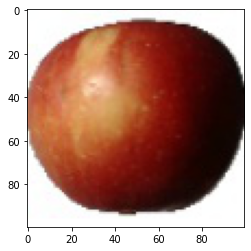

In [26]:
show_example(*dataset[0])

Label:  Apple Golden 3 (4)


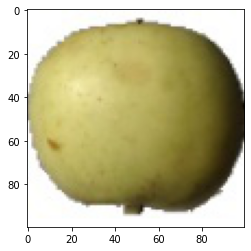

In [27]:
show_example(*dataset[2000])

Label:  Apple Red Yellow 1 (11)


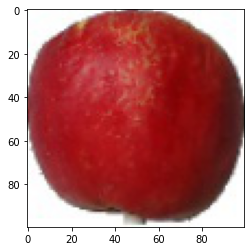

In [28]:
show_example(*dataset[5463])

In [29]:
# Training and Validation Datasets:
# While building real world machine learning models, it is quite common to split the dataset into 3 parts:

# Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
# Validation set - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
# Test set - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model. 
# Since there's no predefined validation set, we can set aside a small portion of the training set to be used as the validation set. 
# We'll use the random_split helper method from PyTorch to do this. To ensure that we always create the same validation set.
# we'll also set a seed for the random number generator

# To ensure that we always create the same validation set, we'll also set a seed for the random number generator

random_seed = 42
torch.manual_seed(random_seed);

In [31]:
# let's print the lengths of train_ds and val_ds
val_size = 500
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(10941, 500)

In [32]:
# We can now create data loaders for training and validation, to load the data in batches
from torch.utils.data.dataloader import DataLoader

batch_size=128 # The number of samples (data points) that would be passed through the network at a time.

In [33]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [35]:
# We can look at batches of images from the dataset using the make_grid method from torchvision. 
# Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

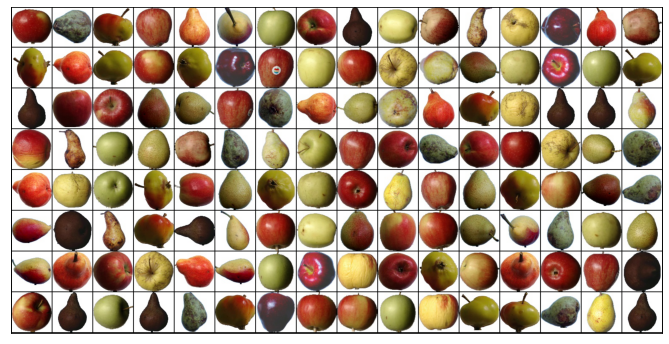

In [37]:
# let's view the grid of batches of images
show_batch(train_dl)

In [39]:
# As the sizes of our models and datasets increase, we need to use GPUs to train our models within a reasonable amount of time.
# GPUs contain hundreds of cores that are optimized for performing expensive matrix operations on floating point numbers in a short time
# This makes GPU(s) ideal for training deep neural networks with many layers.

# We can check if a GPU is available and the required NVIDIA CUDA drivers are installed using torch.cuda.is_available.
torch.cuda.is_available()

True

In [40]:
# Let's define a helper function to ensure that our code uses the GPU if available, and defaults to using the CPU if it isn't.

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
# Next, let's define a function that can move data and model to a chosen device.

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Finally, we define a DeviceDataLoader class to wrap our existing data loaders and move data to the selected device, as a batches are accessed. 
# All we need is an __iter__ method to retrieve batches of data, and an __len__ method to get the number of batches.

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [41]:
# let's check our type of device
device = get_default_device()
device

device(type='cuda')

In [42]:
import torch.nn as nn
import torch.nn.functional as F

In [43]:
# let's define our model

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        # . A commonly used loss function for classification problems is the cross entropy.
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [44]:
input_size=3*100*100 # parameters
output_size=22

In [45]:
# NOW LET'S UNDERSTAND FEEDFORWARD NEURAL NETWORKS 
# Feedforward neural networks were among the first and most successful learning algorithms.
# They are also called deep networks, multi-layer perceptron (MLP), or simply neural networks. 
# As data travels through the network’s artificial mesh, each layer processes an aspect of the data, filters outliers, spots familiar entities and pro
# NOW LET'S UNDERSTAND LAYERS OF FEEDFORWARD NEURAL NETWORKS 
# Input layer: This layer consists of the neurons that receive inputs and pass them on to the other layers. 
# The number of neurons in the input layer should be equal to the attributes or features in the dataset.
# Output layer: The output layer is the predicted feature and depends on the type of model you’re building.
# Hidden layer: In between the input and output layer, there are hidden layers based on the type of model. 
# Hidden layers contain a vast number of neurons which apply transformations to the inputs before passing them. 
# As the network is trained, the weights are updated to be more predictive. 
# Introducing a hidden layer and an activation function allows the model to learn more complex, multi-layered and non-linear relationships between the 

In [46]:
class FruitFnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(input_size, 2048) # hidden layer
        self.linear2=nn.Linear(2048, 512) # hidden layer
        self.linear3=nn.Linear(512, 128)  # hidden layer
        self.linear4=nn.Linear(128, 64) #hidden layer
        self.linear5=nn.Linear(64, output_size) # output layer
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        # Apply layers & activation functions
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        # Get predictions using output layer
        return out

In [47]:
# TRAINING THE MODEL

# for epoch in range(num_epochs):
    # Training phase
    # for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
   #  for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
    
@torch.no_grad()

# Here we are using torch.max() function, this function's default behaviour as you can guess by the name is to return maximum among the elements in the Tensor. 
# However, this function also helps get the maximum along a particular dimension, as a Tensor, instead of a single element.
# To specify the dimension (axis – in numpy), there is another optional keyword argument, called dim. This represents the direction that we take for the maximum.
# dim=0, (maximum along columns).
# dim=1 (maximum along rows).

def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch) # extract loss
            train_losses.append(loss)
            loss.backward() # generate gradients
            optimizer.step() # All optimizers implement a step() method, that updates the parameters.
            optimizer.zero_grad() # Clears the gradients of all optimized torch.Tensor,because every time a variable is back propogated through,
            
            # the gradient will be accumulated instead of being replaced.
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item() # combine losses
        model.epoch_end(epoch, result)
        history.append(result)
    return history
    


In [48]:
# We have defined an accuracy function which calculates the overall accuracy of the model on an entire batch of outputs, so that we can use it as a met

In [49]:
# Building Feed-Forward neural networks
Fnn_model = FruitFnnModel()
Fnn_model

FruitFnnModel(
  (linear1): Linear(in_features=30000, out_features=2048, bias=True)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=22, bias=True)
)

In [50]:
# Printing out the tensor data of Feed Forward Neural Networks

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = Fnn_model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 100, 100])
out.shape: torch.Size([128, 22])
out[0]: tensor([ 0.0314,  0.0183,  0.0962,  0.0996, -0.0186, -0.0286, -0.0206,  0.0725,
         0.0529,  0.0641, -0.1384, -0.0202, -0.1198,  0.0371, -0.0174,  0.0307,
        -0.0825,  0.0140, -0.0642, -0.0781, -0.1135, -0.0257],
       grad_fn=<SelectBackward0>)


In [51]:
# We can now wrap our data loaders using DeviceDataLoader.

Fnn_train_dl = DeviceDataLoader(train_dl, device)
Fnn_val_dl = DeviceDataLoader(val_dl, device)
to_device(Fnn_model, device);

In [52]:
# Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). 
# We can reuse the to_device function to move the model's parameters to the right device.
Fnn_model = to_device(FruitFnnModel(), device)

In [54]:
# Let's see how the model performs on the validation set with the initial set of weights and biases.
evaluate(Fnn_model, Fnn_val_dl)

{'val_loss': 3.0940279960632324, 'val_acc': 0.019915470853447914}

In [55]:
num_epochs = 3 # An epoch is one single pass of all the input data through the network.

# torch.optim is a package implementing various optimization algorithms
opt_func = torch.optim.Adam

# The amount of change to the model during each step of this search process, or the step size, is called the “learning rate” .
# It is the most important hyperparameter to tune for your neural network in order to achieve good performance on your problem.
# Learning rate controls how quickly or slowly a neural network model learns a problem.
lr = 0.001

In [56]:
# We are now ready to train the model. Let's train for 4 epochs and look at the results. 
Fnn_history = fit(num_epochs, lr, Fnn_model, Fnn_train_dl, Fnn_val_dl, opt_func)

Epoch [0], train_loss: 2.1457, val_loss: 1.1125, val_acc: 0.5768
Epoch [1], train_loss: 0.5371, val_loss: 0.3728, val_acc: 0.8545
Epoch [2], train_loss: 0.1597, val_loss: 0.0641, val_acc: 0.9742
Epoch [3], train_loss: 0.1001, val_loss: 0.0900, val_acc: 0.9661


In [57]:
# While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. 
# This is easier to see using a line graph.

In [59]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('accuracy vs. number of epochs');

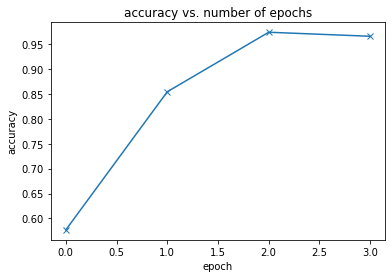

In [60]:
plot_accuracies(Fnn_history)

In [61]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs : ');

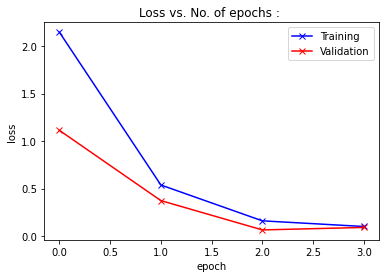

In [62]:
plot_losses(Fnn_history)

In [63]:
# let's check our model's loss and accuracy last time.
evaluate(Fnn_model, Fnn_val_dl)

{'val_loss': 0.09004554152488708, 'val_acc': 0.9661244750022888}

In [64]:
test_dataset = ImageFolder(test_dataset_url, transform=ToTensor())
len(test_dataset)

3823

In [65]:
# NOW LET'S TEST OUR MODEL FOR INDIVIDUAL IMAGES.

In [66]:
# While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. 

In [67]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Apple Red 1 , Predicted: Apple Red 1


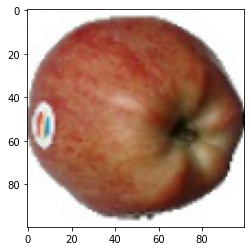

In [69]:
img, label = test_dataset[1200]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

Label: Apple Crimson Snow , Predicted: Apple Crimson Snow


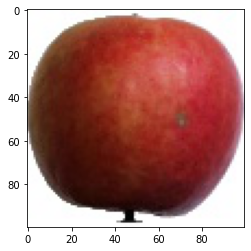

In [70]:
img, label = test_dataset[200]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

Label: Pear Kaiser , Predicted: Pear Stone


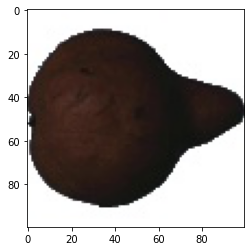

In [71]:
img, label = test_dataset[3000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

Label: Apple Red Yellow 2 , Predicted: Apple Red Yellow 2


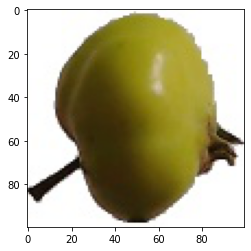

In [72]:
img, label = test_dataset[2100]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

Label: Pear , Predicted: Pear


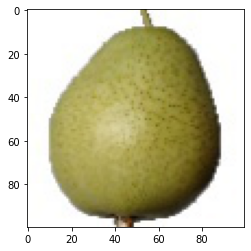

In [73]:
img, label = test_dataset[2200]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))